In [35]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf #can specify in formula like format - requires dataframe as input
import statsmodels.api as sm #can take numpy arrays as well; easier to use predict function
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split

### QUESTION 8

In [2]:
# (a), (b)
np.random.seed(9001)

X = np.random.randn(100)
eps = np.random.randn(100)

B0, B1, B2, B3 = 1, 2, 3, 4
Y = B0 + B1*X + B2*X**2 + B3*X**3 + eps

In [3]:
# (c)

df = pd.DataFrame(data=np.column_stack((Y, X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10)), \
                  columns=['Y', 'X', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'])

df.head()

,Y,X,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.553019,0.200745,0.040299,0.008090,1.623978e-03,3.260056e-04,6.544403e-05,1.313757e-05,2.637303e-06,5.294257e-07,1.062796e-07
1,6.535867,0.859373,0.738522,0.634665,5.454143e-01,4.687142e-01,4.028003e-01,3.461556e-01,2.974767e-01,2.556434e-01,2.196930e-01
2,27.121566,1.579469,2.494723,3.940337,6.223641e+00,9.830049e+00,1.552626e+01,2.452324e+01,3.873371e+01,6.117869e+01,9.662986e+01
3,1.951149,0.012354,0.000153,0.000002,2.329607e-08,2.878083e-10,3.555691e-12,4.392833e-14,5.427069e-16,6.704802e-18,8.283362e-20
4,0.842582,-0.048284,0.002331,-0.000113,5.435165e-06,-2.624314e-07,1.267124e-08,-6.118180e-10,2.954101e-11,-1.426358e-12,6.887027e-14


In [4]:
def LR_subset_sel(x1, y1):
    x1 = sm.add_constant(x1) #need to add intercept for sm; not for smf
    result = sm.OLS(y1, x1).fit()
    return(result)

In [29]:
aic_best = []
bic_best = []
r2adj_best = []
params_aic_best = []
params_bic_best = []
params_r2adj_best = []

for i in range(1, 11):
    cols = combinations(df.columns[1:], i)
    aic = []
    bic = []
    r2_adj = []
    prms = []
    for j, c in enumerate(cols):
        temp_x = df[list(c)]
        temp_y = df['Y']
        k = LR_subset_sel(temp_x, temp_y)
        aic.append(k.aic)
        bic.append(k.bic)
        r2_adj.append(k.rsquared_adj)
        prms.append(k.params)
    
    #finding out the index of the current best model for various criteria
    best_idx_aic = aic.index(min(aic))
    best_idx_bic = bic.index(min(bic))
    best_idx_r2adj = r2_adj.index(max(r2_adj))
    #storing the values of the criteria and params for the selected best model
    aic_best.append(aic[best_idx_aic])
    params_aic_best.append(prms[best_idx_aic])
    bic_best.append(bic[best_idx_bic])
    params_bic_best.append(prms[best_idx_bic])
    r2adj_best.append(r2_adj[best_idx_r2adj])
    params_r2adj_best.append(prms[best_idx_r2adj])
    
    print(i)
    

1
2
3
4
5
6
7
8
9
10


const    1.177686
X        2.165518
X2       2.865021
X3       4.001423
dtype: float64


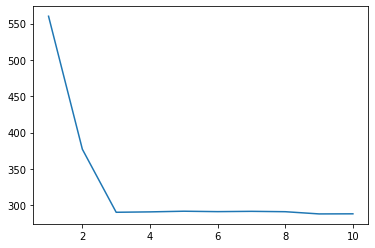

In [37]:
plt.plot(range(1,11), aic_best)
print(params_aic_best[2])

const    1.177686
X        2.165518
X2       2.865021
X3       4.001423
dtype: float64


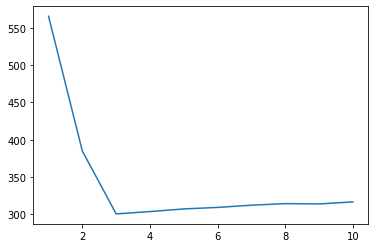

In [39]:
plt.plot(range(1,11), bic_best)
print(params_bic_best[2])

const    1.177686
X        2.165518
X2       2.865021
X3       4.001423
dtype: float64


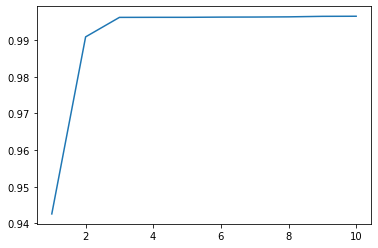

In [41]:
plt.plot(range(1,11), r2adj_best)
print(params_r2adj_best[2])

#All 3 criteria gives the same model; 3 predictors (X, X2, X3) is identified as the best

In [5]:
# FORWARD STEPWISE SELECTION
cols = df.columns[1:].values
col_sel = []
r2adj_best = []
params_r2adj_best = []
for i in range(10):
    r2_adj = []
    prms = []
    c_list = []
    for j, c in enumerate(cols):
        
        if c in col_sel:
            continue
        
        col_list = col_sel + [c]
        temp_x = df[col_list]
        temp_y = df['Y']
        k = LR_subset_sel(temp_x, temp_y)
        r2_adj.append(k.rsquared_adj)
        prms.append(k.params)
        c_list.append(c)
    
    #finding out the index of the current best model
    best_idx_r2adj = r2_adj.index(max(r2_adj))
    #storing the values of the criteria and params for the selected best model
    r2adj_best.append(r2_adj[best_idx_r2adj])
    params_r2adj_best.append(prms[best_idx_r2adj])
    col_sel.append(c_list[best_idx_r2adj])
    
    print(i)

0
1
2
3
4
5
6
7
8
9


['X3', 'X2', 'X', 'X9', 'X7', 'X5', 'X6', 'X10', 'X8', 'X4']
const    1.177686
X3       4.001423
X2       2.865021
X        2.165518
dtype: float64


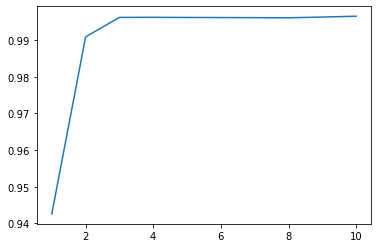

In [9]:
print(col_sel)
plt.plot(range(1,11), r2adj_best)
print (params_r2adj_best[2])

#the predictors are X3, X2, X1 and the estimated coefficients are close to the original value

In [15]:
# (d)

alphas = np.linspace(.0001, .1, 1000)

x = df[df.columns[1:]]
y = df['Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#Not doing CV manually; using the LassoCV class to choose alpha automatically based on CV
lr_lassocv = LassoCV(alphas=alphas, normalize=True, max_iter = 100000).fit(x_train, y_train)


In [21]:
alpha_chosen = lr_lassocv.alpha_

lasso = Lasso(alpha=alpha_chosen, normalize=True, max_iter=10000).fit(x_train, y_train)
# R2 value of predicting y based on x_test; y_test is the true value
print("R2 of predicting y based on x_test = ", lasso.score(x_test, y_test))
#coefficients as predicted by the lasso regression
print ("Coefficients", lasso.coef_)

#Lasso does a fairly good job of eliminating the preidctors and identifying the first 3 as significant
#The values are also close to the true values

R2 of predicting y based on x_test =  0.9913609294678845
Coefficients [2.33707960e+00 2.76141551e+00 3.91747301e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24461905e-03 0.00000000e+00
 1.12048086e-04 0.00000000e+00]


### QUESTION 9

In [23]:
college = pd.read_csv('/home/harsh/Desktop/ISLR/dataset/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [24]:
# (a)
df = college.drop(['Unnamed: 0', 'Private'], axis=1)
X = df[df.columns[1:]].values
Y = df['Apps']
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [29]:
# (b)

lr = LinearRegression().fit(x_train, y_train)
print ('R2 for linear model using least squares on test data = ', lr.score(x_test, y_test))

R2 for linear model using least squares on test data =  0.9000457292126526


In [36]:
# (c)

alphas = np.linspace(.01, 100, 1000)
lr_ridgecv = RidgeCV(alphas=alphas, normalize=True, cv=5).fit(x_train, y_train)

alpha_chosen = lr_ridgecv.alpha_
ridge = Ridge(alpha=alpha_chosen, normalize=True).fit(x_train, y_train)
print('R2 for ridge regression on test data = ', ridge.score(x_test, y_test))

R2 for ridge regression on test data =  0.9037723643979657


In [30]:
# (d)

alphas = np.linspace(.01, 100, 1000)
lr_lassocv = LassoCV(alphas=alphas, normalize=True, max_iter = 100000).fit(x_train, y_train)

alpha_chosen = lr_lassocv.alpha_
lasso = Lasso(alpha=alpha_chosen, normalize=True, max_iter=10000).fit(x_train, y_train)
print('R2 for lasso regression on test data = ', lasso.score(x_test, y_test))

R2 for lasso regression on test data =  0.8984985652646411
